In [100]:
# Pacotes necessários para a análise exploratória
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

In [101]:
 # Função para plotagem dos mapas de correlação
def plot_heatmap(height, data):
    plt.figure(figsize=(height,height*0.75))
    return sns.heatmap(data.corr(), vmin=-1, center=0, vmax=1)

In [103]:
try:
    my_abs_path = Path("data.csv").resolve(strict=True)
except FileNotFoundError:
    data=pd.read_csv('http://www.aneel.gov.br/dados/relatorios?p_p_id=dadosabertos_WAR_dadosabertosportlet&p_p_lifecycle=2&p_p_state=normal&p_p_mode=view&p_p_resource_id=gerarGeracaoFonteCSV&p_p_cacheability=cacheLevelPage&p_p_col_id=column-2&p_p_col_count=1')
    data.to_csv('data.csv')
else:
    data=pd.read_csv('data.csv')

In [104]:
data.head()

,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento
0,1,Biomassas,0.00000,1,2000,13/09/2017 00:00:00
1,2,Biomassas,0.00000,1,2001,13/09/2017 00:00:00
2,3,Biomassas,0.00000,1,2002,13/09/2017 00:00:00
3,4,Biomassas,0.05547,1,2003,13/09/2017 00:00:00
4,5,Biomassas,0.00000,1,2004,13/09/2017 00:00:00


In [105]:
data['competencia'] = data['anoReferencia'] + data['mesReferencia'] / 12 - 1/12
data.head()

,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia
0,1,Biomassas,0.00000,1,2000,13/09/2017 00:00:00,2000.0
1,2,Biomassas,0.00000,1,2001,13/09/2017 00:00:00,2001.0
2,3,Biomassas,0.00000,1,2002,13/09/2017 00:00:00,2002.0
3,4,Biomassas,0.05547,1,2003,13/09/2017 00:00:00,2003.0
4,5,Biomassas,0.00000,1,2004,13/09/2017 00:00:00,2004.0


In [108]:
data[data['nomFonteGeracao'] == 'Biomassas'].sort_values(by=['competencia'])

,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia
0,1,Biomassas,0.000000,1,2000,13/09/2017 00:00:00,2000.000000
69,70,Biomassas,0.000000,2,2000,13/09/2017 00:00:00,2000.083333
87,88,Biomassas,0.000000,3,2000,13/09/2017 00:00:00,2000.166667
105,106,Biomassas,358.885600,4,2000,13/09/2017 00:00:00,2000.250000
122,123,Biomassas,0.000000,5,2000,13/09/2017 00:00:00,2000.333333
139,140,Biomassas,0.000000,6,2000,13/09/2017 00:00:00,2000.416667
156,157,Biomassas,0.000000,7,2000,13/09/2017 00:00:00,2000.500000
173,174,Biomassas,0.000000,8,2000,13/09/2017 00:00:00,2000.583333
190,191,Biomassas,0.000000,9,2000,13/09/2017 00:00:00,2000.666667
18,19,Biomassas,0.000000,10,2000,13/09/2017 00:00:00,2000.750000


In [109]:
data[data['nomFonteGeracao'] == 'Biomassas'].head()

,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia
0,1,Biomassas,0.00000,1,2000,13/09/2017 00:00:00,2000.0
1,2,Biomassas,0.00000,1,2001,13/09/2017 00:00:00,2001.0
2,3,Biomassas,0.00000,1,2002,13/09/2017 00:00:00,2002.0
3,4,Biomassas,0.05547,1,2003,13/09/2017 00:00:00,2003.0
4,5,Biomassas,0.00000,1,2004,13/09/2017 00:00:00,2004.0


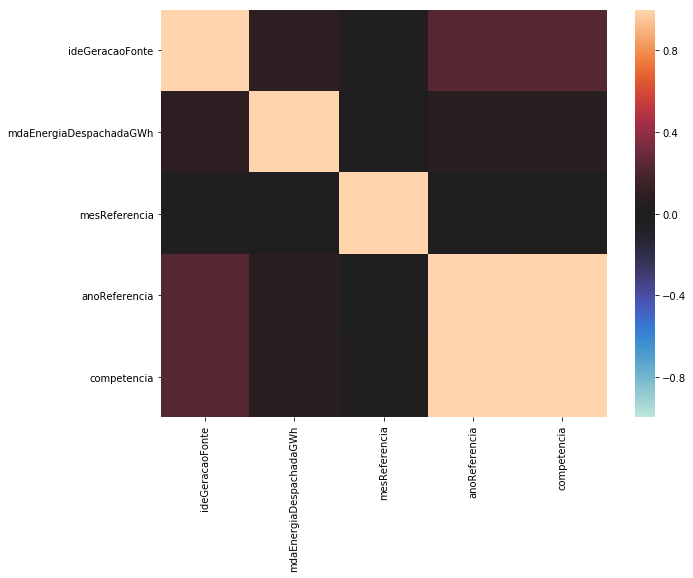

In [110]:
 # Imprime a matriz de correlação entre as variáveis
ax = plot_heatmap(10, data)

In [111]:
print(set(data['nomFonteGeracao']))

{'Oleo Diesel / Combustivel', 'Gas Natural', 'Energia produzida fora do SIN', 'Eolicas', 'Itaipu', 'Hidreletricas exclusive Itaipu', 'Residuos Processos Industriais', 'Nuclear', 'Biomassas', 'Carvao'}


In [112]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)
data['FonteGeracao'] = label_encoder.fit_transform(data['nomFonteGeracao'])
pd.get_dummies(data['FonteGeracao']).rename(index=str, columns={0: "a", "1": "c"}).tail()

,a,1,2,3,4,5,6,7,8,9
2245,0,0,0,1,0,0,0,0,0,0
2246,1,0,0,0,0,0,0,0,0,0
2247,0,0,0,0,0,0,0,1,0,0
2248,0,0,0,0,0,0,0,0,0,1
2249,0,0,1,0,0,0,0,0,0,0


In [115]:
data[['nomFonteGeracao','FonteGeracao']].tail(10)

,nomFonteGeracao,FonteGeracao
2240,Hidreletricas exclusive Itaipu,5
2241,Itaipu,6
2242,Oleo Diesel / Combustivel,8
2243,Gas Natural,4
2244,Carvao,1
2245,Eolicas,3
2246,Biomassas,0
2247,Nuclear,7
2248,Residuos Processos Industriais,9
2249,Energia produzida fora do SIN,2


In [116]:
data.tail()

,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia,FonteGeracao
2245,2276,Eolicas,5138.397764,9,2018,09/01/2019 00:00:00,2018.666667,3
2246,2277,Biomassas,906.250506,9,2018,09/01/2019 00:00:00,2018.666667,0
2247,2278,Nuclear,1448.836759,9,2018,09/01/2019 00:00:00,2018.666667,7
2248,2279,Residuos Processos Industriais,943.233728,9,2018,09/01/2019 00:00:00,2018.666667,9
2249,2280,Energia produzida fora do SIN,244.488764,9,2018,09/01/2019 00:00:00,2018.666667,2


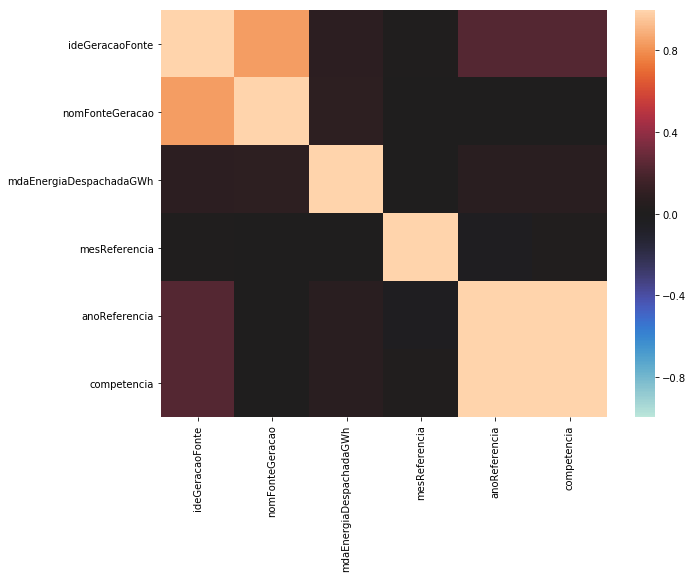

In [66]:
 # Imprime a matriz de correlação entre as variáveis - depois das transformações
ax = plot_heatmap(10, data)

In [67]:
data[data['nomFonteGeracao'] == 0].sort_values(by=['competencia'])

,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia
0,1,0,0.000000,1,2000,13/09/2017 00:00:00,2000.083333
69,70,0,0.000000,2,2000,13/09/2017 00:00:00,2000.166667
87,88,0,0.000000,3,2000,13/09/2017 00:00:00,2000.250000
105,106,0,358.885600,4,2000,13/09/2017 00:00:00,2000.333333
122,123,0,0.000000,5,2000,13/09/2017 00:00:00,2000.416667
139,140,0,0.000000,6,2000,13/09/2017 00:00:00,2000.500000
156,157,0,0.000000,7,2000,13/09/2017 00:00:00,2000.583333
173,174,0,0.000000,8,2000,13/09/2017 00:00:00,2000.666667
190,191,0,0.000000,9,2000,13/09/2017 00:00:00,2000.750000
18,19,0,0.000000,10,2000,13/09/2017 00:00:00,2000.833333


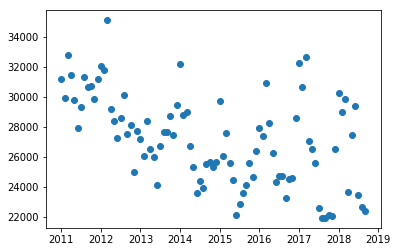

In [120]:
filtr = data[(data['FonteGeracao'] == 5) & (data['anoReferencia'] > 2010)]
plt.scatter(filtr['competencia'], filtr['mdaEnergiaDespachadaGWh'])

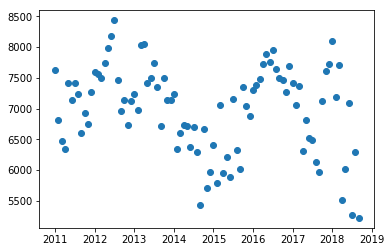

In [118]:
filtr = data[(data['FonteGeracao'] == 6) & (data['anoReferencia'] > 2010)]
plt.scatter(filtr['competencia'], filtr['mdaEnergiaDespachadaGWh'])